In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_metrics(data, xlabel, ylabel, data_std=None, title=None, legend_labels=None, save_path=None, marker="o", max_y=None, max_steps=None):
    plt.figure(dpi=200)
    for i, values in enumerate(data):
        values = np.array(values)[:max_steps]
        if data_std:
            std_dev = np.array(data_std[i])[:max_steps] if data_std else np.zeros_like(values)
        
        x_steps = np.arange(1, len(values) + 1) 

        if legend_labels and legend_labels[i] == "Random Policy Agent":
            plt.plot(x_steps, values, label=legend_labels[i], marker=marker, linestyle='--', color='red')
        elif legend_labels and legend_labels[i] == "IG agent(DoubleCnn 19x19 - IM policy)":
            plt.plot(x_steps, values, label=legend_labels[i] if legend_labels else None, marker=marker, color='red')
        elif legend_labels and legend_labels[i] == "IG agent(DoubleCnn 19x19 - ε-greedy)":
            plt.plot(x_steps, values, label=legend_labels[i] if legend_labels else None, marker=marker, color='green')
        elif legend_labels and legend_labels[i] == "IG agent(Belief+Entopy+POV - ε-greedy)":
            plt.plot(x_steps, values, label=legend_labels[i] if legend_labels else None, marker=marker, color='orange')
        else:
            plt.plot(x_steps, values, label=legend_labels[i] if legend_labels else None, marker=marker)
        
        if data_std and legend_labels[i] != "Random Policy Agent":
            plt.fill_between(x_steps, values - std_dev, values + std_dev, alpha=0.2)
        if legend_labels and legend_labels[i] == "Random Policy Agent":
            plt.fill_between(x_steps, values - std_dev, values + std_dev, alpha=0.1, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if max_y is not None:
        plt.ylim(top=max_y)
    if title:
        plt.title(title)
    plt.grid(True)
    if legend_labels:
        plt.legend()
    if save_path:
        plt.savefig(save_path)
    plt.show()


def save_dict(dictionary, file_path):
    with open(file_path, "w") as file:
        json.dump(dictionary, file)


def read_dict(file_path):
    with open(file_path, "r") as file:
        load_dictionary = json.load(file)

    return load_dictionary

# Train data

In [4]:
train_data = read_dict("data/train_data_2025-09-30_09-47-35.json")
train_data.keys()

dict_keys(['training_time', 'episode_rewards', 'episode_accuracy'])

In [5]:
len(train_data['episode_rewards'])

200

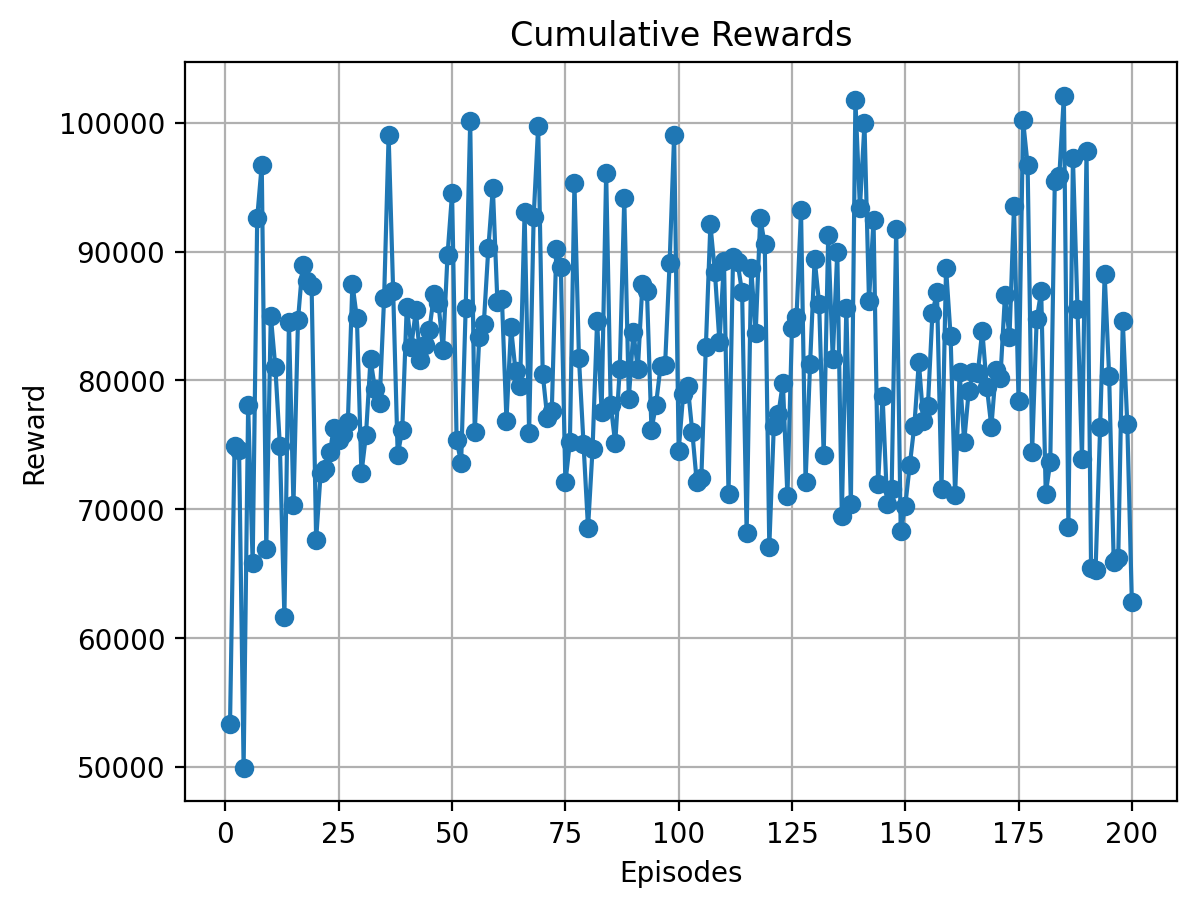

In [9]:
plot_metrics([train_data['episode_rewards']],
             title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodes")

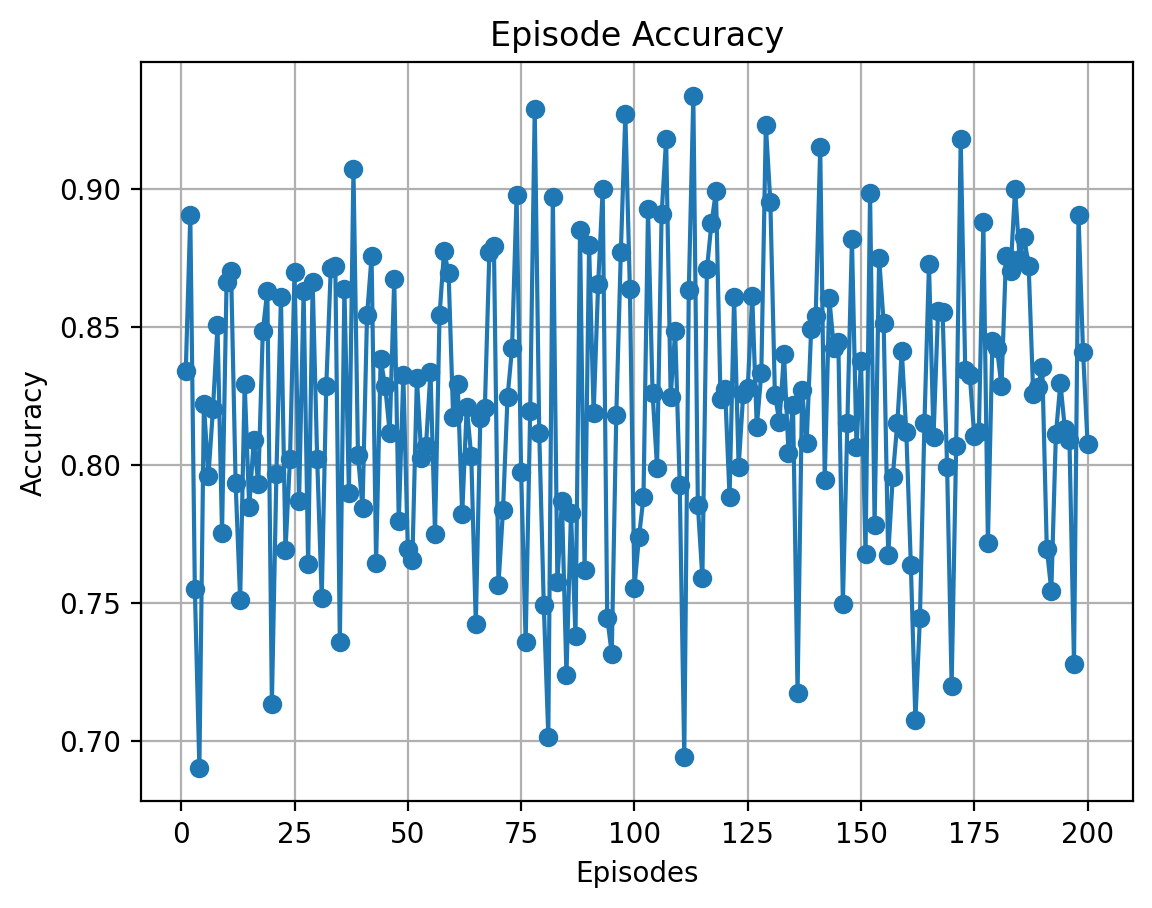

In [10]:
plot_metrics([train_data['episode_accuracy']],
                title="Episode Accuracy",
                ylabel="Accuracy",
                xlabel="Episodes")

# Test Data

In [35]:
test_data = read_dict("data/test_data_2025-09-30_09-47-35.json")
test_data_random = read_dict("data/test_data_random.json")
test_data.keys()

dict_keys(['all_rewards', 'mean_reward', 'std_reward', 'all_accuracies', 'mean_accuracy', 'std_accuracy', 'all_steps_accuracy'])

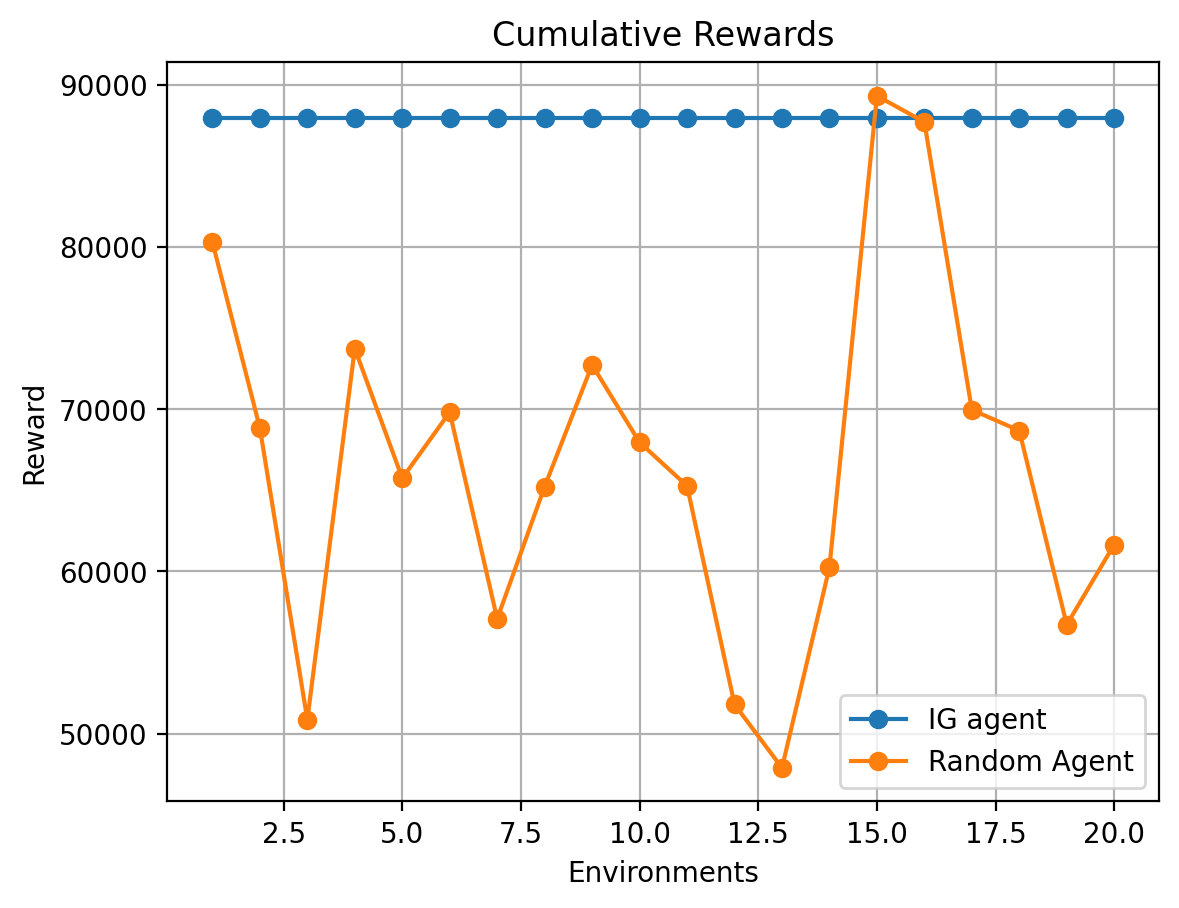

In [51]:
plot_metrics([test_data['all_rewards'], test_data_random['all_rewards']],
                title="Cumulative Rewards",
                ylabel="Reward",
                xlabel="Environments",
                legend_labels=["IG agent", "Random Agent"])

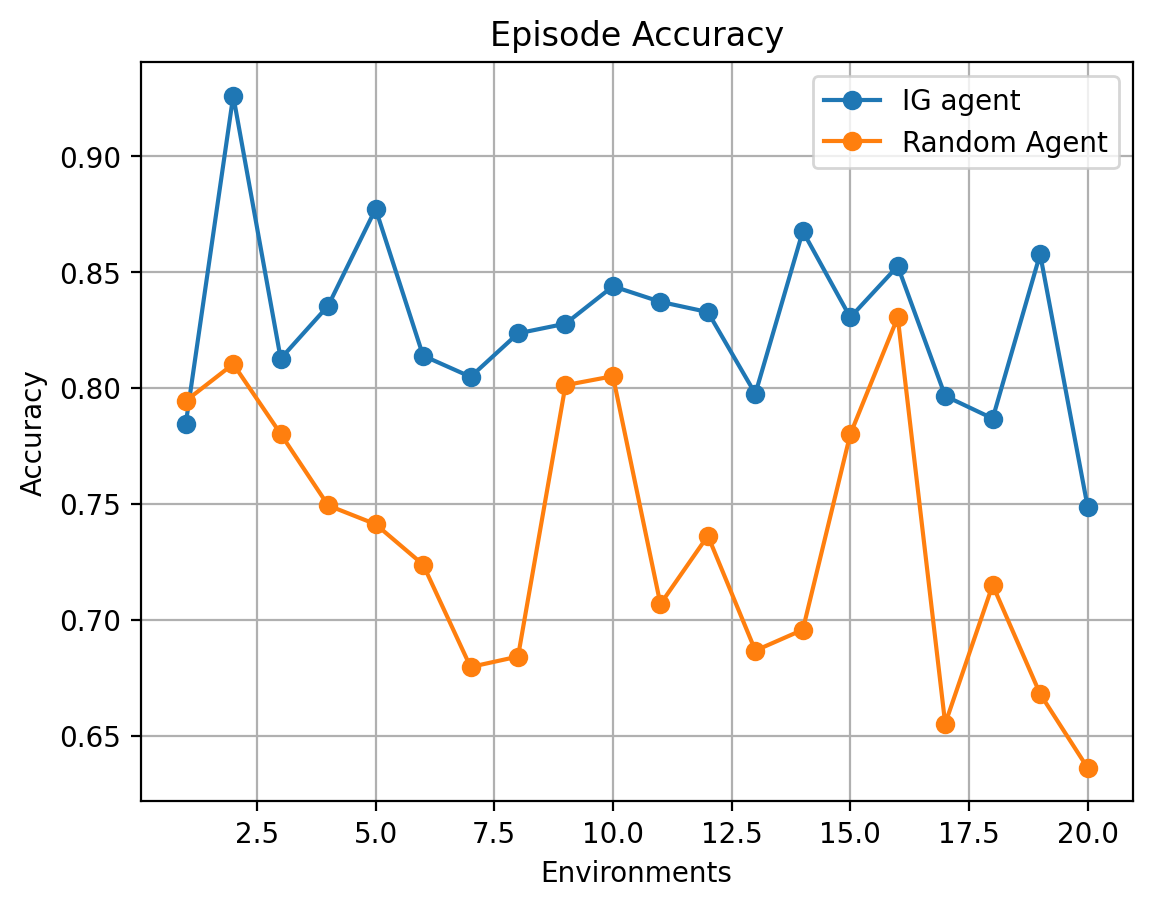

In [49]:
plot_metrics([test_data['all_accuracies'], test_data_random['all_accuracies']],
                title="Episode Accuracy",
                ylabel="Accuracy",
                xlabel="Environments",
                legend_labels=["IG agent", "Random Agent"])

In [38]:
means = np.mean(test_data['all_steps_accuracy'], axis=0).tolist()
std = np.std(test_data['all_steps_accuracy'], axis=0).tolist()
means_random = np.mean(test_data_random['all_steps_accuracy'], axis=0).tolist()
std_random = np.std(test_data_random['all_steps_accuracy'], axis=0).tolist()

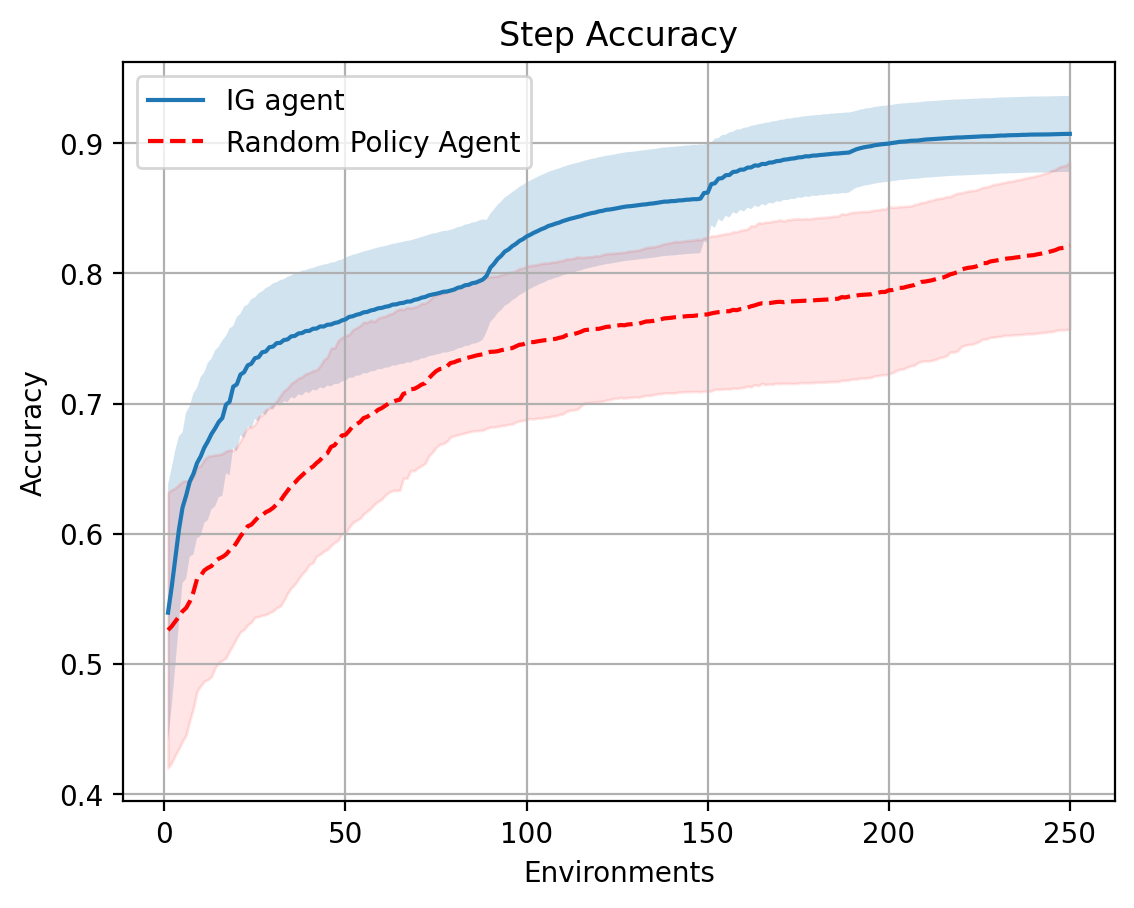

In [54]:
plot_metrics([means, means_random],
                title="Step Accuracy",
                ylabel="Accuracy",
                xlabel="Environments",
                data_std=[std, std_random],
                marker=None,
                legend_labels=["IG agent", "Random Policy Agent"])